In [1]:
# load important dependencies 
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 无约束优化（optimtool.unconstrain）
```python
import optimtool.unconstrain as ou
ou.[方法名].[函数名]([目标函数], [参数表], [初始迭代点])
```
$$
f(x)=\sum_{i=1}^{n/2}(-13+x_{2i-1}+((5-x_{2i})x_{2i}-2)x_{2i})^2+(-29+x_{2i-1}+((x_{2i}+1)x_{2i}-14)x_{2i})^2, x_0=[0.5, -2, 0.5, -2, ..., 0.5, -2].
$$

In [2]:
import optimtool.unconstrain as ou
x = sp.symbols("x1:5")
f = (-13 + x[0] + ((5 - x[1])*x[1] - 2)*x[1])**2 + \
    (-29 + x[0] + ((x[1] + 1)*x[1] - 14)*x[1])**2 + \
    (-13 + x[2] + ((5 - x[3])*x[3] - 2)*x[3])**2 + \
    (-29 + x[2] + ((x[3] + 1)*x[3] - 14)*x[3])**2
x_0 = (1, -1, 1, -1) # Random given

## 梯度下降法（gradient_descent）

```python
ou.gradient_descent.[函数名]([目标函数], [参数表], [初始迭代点])
```

| 方法头                                                                                                                                 | 解释                                   |
| ----------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------ |
| solve(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, epsilon: Optional[float]=1e-10, k: Optional[int]=0) -> OutputType                                                             | 通过解方程的方式来求解精确步长                      |
| steepest(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, method: Optional[str]="wolfe", epsilon: Optional[float]=1e-10, k: Optional[int]=0) -> OutputType                                           | 使用线搜索方法求解非精确步长（默认使用wolfe线搜索）         |
| barzilar_borwein(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, method: Optional[str]="Grippo", c1: Optional[float]=0.6, beta: Optional[float]=0.6, alpha: Optional[float]=1, epsilon: Optional[float]=1e-10, k: Optional[int]=0) -> OutputType | 使用Grippo与ZhangHanger提出的非单调线搜索方法更新步长 |

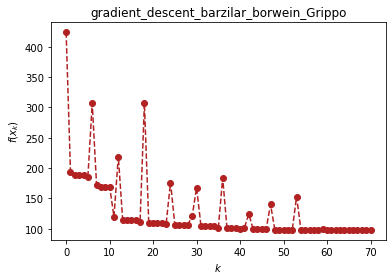

(array([11.41277899, -0.89680525, 11.41277899, -0.89680525]), 70)

In [3]:
ou.gradient_descent.barzilar_borwein(f, x, x_0)

## 牛顿法（newton)

```python
ou.newton.[函数名]([目标函数], [参数表], [初始迭代点])
```

| 方法头                                                                                             | 解释                                |
| ----------------------------------------------------------------------------------------------- | --------------------------------- |
| classic(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, epsilon: Optional[float]=1e-10, k: Optional[int]=0) -> OutputType                        | 通过直接对目标函数二阶导矩阵（海瑟矩阵）进行求逆来获取下一步的步长 |
| modified(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, method: Optional[str]="wolfe", m: Optional[int]=20, epsilon: Optional[float]=1e-10, k: Optional[int]=0) -> OutputType | 修正当前海瑟矩阵保证其正定性（目前只接入了一种修正方法）      |
| CG(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, method: Optional[str]="wolfe", epsilon: Optional[float]=1e-6, k: Optional[int]=0) -> OutputType              | 采用牛顿-共轭梯度法求解梯度（非精确牛顿法的一种）         |

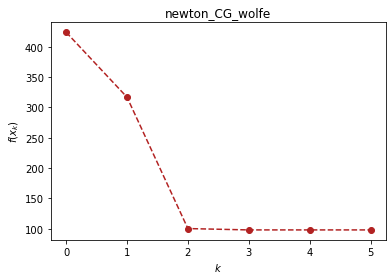

(array([11.41277899, -0.89680525, 11.41277899, -0.89680525]), 5)

In [4]:
ou.newton.CG(f, x, x_0)

## 拟牛顿法（newton_quasi）

```python
ou.newton_quasi.[函数名]([目标函数], [参数表], [初始迭代点])
```

| 方法头                                                                                          | 解释              |
| -------------------------------------------------------------------------------------------- | --------------- |
| bfgs(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, method: Optional[str]="wolfe", m: Optional[float]=20, epsilon: Optional[float]=1e-10, k: Optional[int]=0) -> OutputType  | BFGS方法更新海瑟矩阵    |
| dfp(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, method: Optional[str]="wolfe", m: Optional[float]=20, epsilon: Optional[float]=1e-4, k: Optional[int]=0) -> OutputType    | DFP方法更新海瑟矩阵     |
| L_BFGS(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, method: Optional[str]="wolfe", m: Optional[float]=6, epsilon: Optional[float]=1e-10, k: Optional[int]=0) -> OutputType | 双循环方法更新BFGS海瑟矩阵 |


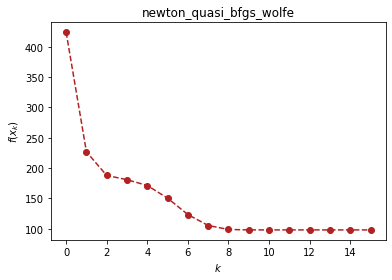

(array([11.41277899, -0.89680525, 11.41277899, -0.89680525]), 15)

In [5]:
ou.newton_quasi.bfgs(f, x, x_0)

## 非线性最小二乘法（nonlinear_least_square）

```python
ou.nonlinear_least_square.[函数名]([目标函数], [参数表], [初始迭代点])
```

| 方法头                                                                                                                                                  | 解释                         |
| ---------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------- |
| gauss_newton(funcr: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, method: Optional[str]="wolfe", epsilon: Optional[float]=1e-10, k: Optional[int]=0) -> OutputType                                                        | 高斯-牛顿提出的方法框架，包括OR分解等操作     |
| levenberg_marquardt(funcr: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, m: Optional[float]=100, lamk: Optional[float]=1, eta: Optional[float]=0.2, p1: Optional[float]=0.4, p2: Optional[float]=0.9, gamma1: Optional[float]=0.7, gamma2: Optional[float]=1.3, epsilon: Optional[float]=1e-10, k: Optional[int]=0) -> OutputType | Levenberg Marquardt提出的方法框架 |

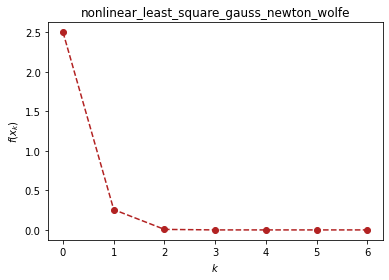

(array([1.00000000e+00, 6.08502493e-21]), 6)

In [6]:
r1, r2, x1, x2 = sp.symbols("r1 r2 x1 x2")
r1 = x1**3 - 2*x2**2 - 1
r2 = 2*x1 + x2 - 2
ou.nonlinear_least_square.gauss_newton((r1, r2), (x1, x2), (1, 1))

## 信赖域方法（trust_region）

```python
ou.trust_region.[函数名]([目标函数], [参数表], [初始迭代点])
```

| 方法头                                                                                                                                               | 解释                  |
| ------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------- |
| steihaug_CG(funcs: FuncArray, args: ArgArray, x_0: PointArray, draw: Optional[bool]=True, output_f: Optional[bool]=False, m: Optional[float]=100, r0: Optional[float]=1, rmax: Optional[float]=2, eta: Optional[float]=0.2, p1: Optional[float]=0.4, p2: Optional[float]=0.6, gamma1: Optional[float]=0.5, gamma2: Optional[float]=1.5, epsilon: Optional[float]=1e-6, k: Optional[int]=0) -> OutputType | 截断共轭梯度法在此方法中被用于搜索步长 |

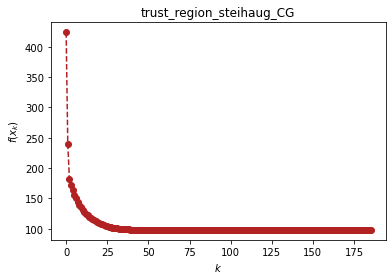

(array([11.41276974, -0.8968058 , 11.41276974, -0.8968058 ]), 185)

In [7]:
ou.trust_region.steihaug_CG(f, x, x_0)